In [2]:
import pandas as pd
import numpy as np

train_orig = pd.read_csv('train.csv')
test_orig = pd.read_csv('test.csv')

train = train_orig.copy()
test = test_orig.copy()

In [3]:
pd.set_option('display.max_columns', 100)
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
## see what datatypes are
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [19]:
## Remove the NA from data
import statistics as st

def removeNA(data):
    train_1 = data.copy()
    train_1['LotFrontage'].fillna(train_1['LotFrontage'].mean(), inplace=True)
    train_1['Alley'].fillna('No', inplace=True)
    train_1['MasVnrType'].fillna('None', inplace=True)
    train_1['MasVnrArea'].fillna(0.0, inplace=True)
    train_1['BsmtQual'].fillna('NA', inplace=True)
    train_1['BsmtCond'].fillna('NA', inplace=True)
    train_1['BsmtExposure'].fillna('NA', inplace=True)
    train_1['BsmtFinType1'].fillna('NA', inplace=True)
    train_1['BsmtFinType2'].fillna('NA', inplace=True)
    train_1['Electrical'].fillna(st.mode(train_1['Electrical']), inplace=True)
    train_1['FireplaceQu'].fillna('NA', inplace=True)
    train_1['GarageType'].fillna('NA', inplace=True)
    train_1['GarageYrBlt'].fillna(train_1['YearBuilt'], inplace=True)
    train_1['GarageFinish'].fillna('Unf', inplace=True)
    train_1['GarageQual'].fillna(st.mode(train_1['GarageQual']), inplace=True)
    train_1['GarageCond'].fillna(st.mode(train_1['GarageCond']), inplace=True)
    train_1['PoolQC'].fillna('None', inplace=True)
    train_1['Fence'].fillna('None', inplace=True)
    train_1['MiscFeature'].fillna('None', inplace=True)
    train_1['BsmtFinSF1'].fillna(0.0, inplace=True)
    train_1['BsmtFinSF2'].fillna(0.0, inplace=True)
    train_1['BsmtUnfSF'].fillna(0.0, inplace=True)
    train_1['TotalBsmtSF'].fillna(0.0, inplace=True)
    train_1['BsmtFullBath'].fillna(0.0, inplace=True)
    train_1['BsmtHalfBath'].fillna(0.0, inplace=True)
    train_1['KitchenQual'].fillna(st.mode(train_1['KitchenQual']), inplace=True)
    train_1['Functional'].fillna(st.mode(train_1['Functional']), inplace=True)
    train_1['GarageCars'].fillna(0.0, inplace=True)
    train_1['GarageArea'].fillna(0.0, inplace=True)
    train_1['SaleType'].fillna(st.mode(train_1['SaleType']), inplace=True)
    train_1['MSZoning'].fillna(st.mode(train_1['MSZoning']), inplace=True)
    train_1['Utilities'].fillna(st.mode(train_1['Utilities']), inplace=True)
    train_1['Exterior1st'].fillna(st.mode(train_1['Exterior1st']), inplace=True)
    train_1['Exterior2nd'].fillna(st.mode(train_1['Exterior2nd']), inplace=True)
    
    return train_1

In [7]:
import statistics as st

train_1 = train.copy()
train_1['LotFrontage'].fillna(train_1['LotFrontage'].mean(), inplace = True)
train_1['Alley'].fillna('No', inplace = True)
train_1['MasVnrType'].fillna('None', inplace = True)
train_1['MasVnrArea'].fillna(0.0, inplace = True)
train_1['BsmtQual'].fillna('NA', inplace = True)
train_1['BsmtCond'].fillna('NA', inplace = True)
train_1['BsmtExposure'].fillna('NA', inplace = True)
train_1['BsmtFinType1'].fillna('NA', inplace = True)
train_1['BsmtFinType2'].fillna('NA', inplace = True)
train_1['Electrical'].fillna(st.mode(train_1['Electrical']), inplace = True)
train_1['FireplaceQu'].fillna('NA', inplace = True)
train_1['GarageType'].fillna('NA', inplace = True)
train_1['GarageYrBlt'].fillna(train_1['YearBuilt'], inplace = True)
train_1['GarageFinish'].fillna('Unf', inplace = True)
train_1['GarageQual'].fillna(st.mode(train_1['GarageQual']), inplace = True)
train_1['GarageCond'].fillna(st.mode(train_1['GarageCond']), inplace = True)
train_1['PoolQC'].fillna('None', inplace = True)
train_1['Fence'].fillna('None', inplace = True)
train_1['MiscFeature'].fillna('None', inplace = True)

train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

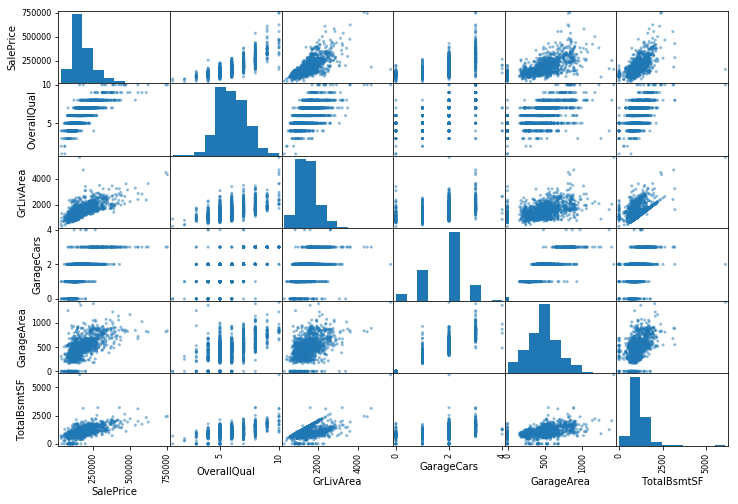

In [84]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

high_corr_att = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
scatter_matrix(train[high_corr_att], figsize = (12,8))
plt.show()

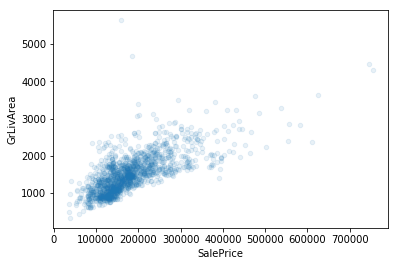

In [21]:
train_1.plot(kind = 'scatter', x = 'SalePrice', y = 'GrLivArea', alpha = 0.1)
plt.show()

In [22]:
train_2 = train_1.copy()

train_2['_full_baths_per_sqft'] = train_2['FullBath'] / train_2['GrLivArea']
train_2['_fireplace_per_sqft'] = train_2['Fireplaces'] / train_2['GrLivArea']
train_2['_porch_per_sqft'] = train_2['OpenPorchSF'] / train_2['GrLivArea']
train_2['_halfb_per_fullb'] = train_2['HalfBath'] / train_2['FullBath']
train_2['_total_baths'] = train_2['HalfBath'] + train_2['FullBath']
train_2['_qual_area'] = train_2['OverallQual'] * train_2['GrLivArea']
train_2['_area_room'] = train_2['GrLivArea'] * train_2['TotRmsAbvGrd']
train_2['_area_per_room'] = train_2['GrLivArea'] / train_2['TotRmsAbvGrd']
train_2['_bsmt_total'] = train_2['GrLivArea'] * train_2['TotalBsmtSF']
train_2['_garage_liv_qual'] = train_2['GarageCars'] * train_2['GrLivArea'] * train_2['OverallQual']
train_2['_ye_gar_remod'] = train_2['YearBuilt'] * train_2['GarageYrBlt'] * train_2['YearRemodAdd']
train_2['_bsmt_unf_fin'] = (1 + train_2['BsmtUnfSF']) * (1 + train_2['BsmtFinSF1'])
train_2['_yr_sold_built'] = train_2['YrSold'] * train_2['YearBuilt']
train_2['_total_deck'] = train_2['WoodDeckSF'] + train_2['OpenPorchSF'] + train_2['EnclosedPorch'] + train_2['3SsnPorch'] + train_2['ScreenPorch']

In [25]:
corr_matrix = train_2.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice               1.000000
_garage_liv_qual        0.866489
_qual_area              0.832057
OverallQual             0.790982
GrLivArea               0.708624
_area_room              0.647522
GarageCars              0.640409
_bsmt_total             0.631401
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
_ye_gar_remod           0.575316
_total_baths            0.568267
FullBath                0.560664
_area_per_room          0.540645
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
_yr_sold_built          0.521489
GarageYrBlt             0.508043
YearRemodAdd            0.507101
MasVnrArea              0.472614
Fireplaces              0.466929
_bsmt_unf_fin           0.422112
_total_deck             0.390993
BsmtFinSF1              0.386420
LotFrontage             0.334901
WoodDeckSF              0.324413
2ndFlrSF                0.319334
OpenPorchSF             0.315856
HalfBath                0.284108
LotArea   

In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train_nums = list(train_1.drop('SalePrice', axis = 1).copy().select_dtypes(include=numerics))
train_cats = list(train_1.select_dtypes(['object']).columns)
train_labels = train_1['SalePrice'].copy()

print('Attributes:', len(train_1.drop('SalePrice', axis = 1).copy().columns.values))
print('Attributes Split:', len(train_nums) + len(train_cats))

fb_ix = train_nums.index('FullBath')
grliv_ix = train_nums.index('GrLivArea')
fp_ix = train_nums.index('Fireplaces')
opsf_ix = train_nums.index('OpenPorchSF')
hb_ix = train_nums.index('HalfBath')
oq_ix = train_nums.index('OverallQual')
trag_ix = train_nums.index('TotRmsAbvGrd')

bsmt_ix = train_nums.index('TotalBsmtSF')
g_car_ix = train_nums.index('GarageCars')
yr_built_ix = train_nums.index('YearBuilt')
g_yr_built_ix = train_nums.index('GarageYrBlt')
yr_remod_ix = train_nums.index('YearRemodAdd')
b_unf_sf = train_nums.index('BsmtUnfSF')
b_fin_sf = train_nums.index('BsmtFinSF1')
yr_sold = train_nums.index('YrSold')
w_deck_sf = train_nums.index('WoodDeckSF')
o_porch_sf = train_nums.index('OpenPorchSF')
e_porch_sf = train_nums.index('EnclosedPorch')
ssn_porch = train_nums.index('3SsnPorch')
scr_porch = train_nums.index('ScreenPorch')

Attributes: 80
Attributes Split: 80


In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, new_params = True):
        self.new_params = new_params
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        if self.new_params:
            
            _full_baths_per_sqft = X[:, fb_ix] / X[:, grliv_ix]
            _fireplace_per_sqft = X[:, fp_ix] / X[:, grliv_ix]
            _porch_per_sqft = X[:, opsf_ix] / X[:, grliv_ix]
            # _halfb_per_fullb = X[:, hb_ix] / X[:, fb_ix]
            _total_baths = X[:, hb_ix] + X[:, fb_ix]
            _qual_area = X[:, oq_ix] * X[:, grliv_ix]
            _area_per_room = X[:, grliv_ix] / X[:, trag_ix]
            
            
            _bsmt_total = X[:, grliv_ix] * X[:, bsmt_ix]
            _garage_liv_qual = X[:, g_car_ix] * X[:, grliv_ix] * X[:, oq_ix]
            _ye_gar_remod = X[:, yr_built_ix] * X[:, g_yr_built_ix] * X[:, yr_remod_ix]
            _bsmt_unf_fin = (1 + X[:, b_unf_sf]) * (1 * X[:, b_fin_sf])
            _yr_sold_built = X[:, yr_sold] * X[:, yr_built_ix]
            _total_deck = X[:, w_deck_sf] + X[:, o_porch_sf] + X[:, e_porch_sf] + X[:, ssn_porch] + X[:, scr_porch]

            #, _full_baths_per_sqft, _fireplace_per_sqft, _porch_per_sqft, _halfb_per_fullb, _total_baths, _qual_area, _area_per_room 
            return np.c_[X, _full_baths_per_sqft, _fireplace_per_sqft, _porch_per_sqft, _total_baths, 
                         _qual_area, _area_per_room, _bsmt_total, _garage_liv_qual, _ye_gar_remod,
                        _bsmt_unf_fin, _yr_sold_built, _total_deck]
        else:
            return np.c_[X]

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_nums),
        ("cat", OneHotEncoder(), train_cats),
    ])

In [31]:
train_na = removeNA(train)
test_na = removeNA(test)
train_labels = train_na['SalePrice'].copy()

train_prepared = full_pipeline.fit_transform(train_na.drop('SalePrice', axis=1).copy())
test_prepared = full_pipeline.fit_transform(test_na.copy())

X_train = train_prepared.copy()
y_train = train_labels.copy()

X_test = test_prepared.copy()

In [34]:
X_train2 = pd.DataFrame([ pd.SparseSeries(X_train[i].toarray().ravel()) 
                              for i in np.arange(X_train.shape[0]) ])

In [ ]:
########################################################################
########################################################################
####
####  Model Training
####
########################################################################
########################################################################

In [67]:
train_test = pd.concat([train_na.drop('SalePrice', axis = 1).copy(), test_na.copy()], axis=0)
prepared = full_pipeline.fit_transform(train_test.copy())

train_prepared = prepared[0:1460, :].copy()
test_prepared = prepared[1460:, :].copy()

X_train = train_prepared.copy()
y_train = train_labels.copy()

X_test = test_prepared.copy()

In [57]:
########################################################################
##  XGBoost
########################################################################

from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor()
grid_xgb = {
    'learning_rate': [x/100 for x in range(1, 10)],
    'n_estimators': [1750],
    'min_child_weight': [0.9, 1, 1.05, 1.1, 1.2, 1.3, 1.5],
    'max_delta_step': [0, 0.5, 0.05, 0.1],
    'max_depth': [x for x in range(3, 10)],
    'subsample': [0.4 + x/10 for x in range(1, 4)],
    'gamma': [0, 1e-5, 1e-6],
    'colsample_bytree': [0.4 + x/10 for x in range(1, 6)],
    #'lambda': [0.9 + x/50 for x in range(1,10)],
    #'alpha': [0, 0.05, 0.1]
}

clf_xgb = RandomizedSearchCV(xgb, grid_xgb, cv=5, n_iter=100, scoring='neg_mean_absolute_error')
clf_xgb.fit(X_train, y_train)

y_true, y_pred = y_train, clf_xgb.predict(X_train)

var = explained_variance_score(y_true, y_pred)
ab_err = mean_absolute_error(y_true, y_pred)
sq_err = mean_squared_error(y_true, y_pred)
sq_log_err = mean_squared_log_error(y_true, y_pred)
med_err = median_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('**** XGBoost ****')
print('Best Parameters:', clf_xgb.best_params_)
print('Explained Variance:', var)
print('Mean Absolute Error:', ab_err)
print('Mean Squared Error:', sq_err)
print('Mean Squared Log Error:', sq_log_err)
print('Median Absolute Error:', med_err)
print('R2:', r2)

clf_xgb.best_estimator_.save_model('xgb_best_2018-11-28.model')

**** XGBoost ****
Best Parameters: {'subsample': 0.6000000000000001, 'n_estimators': 1750, 'min_child_weight': 1.3, 'max_depth': 5, 'max_delta_step': 0.05, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.5}
Explained Variance: 0.9943801625329264
Mean Absolute Error: 4532.964477204623
Mean Squared Error: 35443127.83325592
Mean Squared Log Error: 0.0017374435270986048
Median Absolute Error: 3535.0625
R2: 0.9943801623673274


In [58]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

y_true, y_pred = y_train, clf_xgb.predict(X_train)

var = explained_variance_score(y_true, y_pred)
ab_err = mean_absolute_error(y_true, y_pred)
sq_err = mean_squared_error(y_true, y_pred)
sq_log_err = mean_squared_log_error(y_true, y_pred)
med_err = median_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('**** XGBoost ****')
print('Best Parameters:', clf_xgb.best_params_)
print('Explained Variance:', var)
print('Mean Absolute Error:', ab_err)
print('Mean Squared Error:', sq_err)
print('Mean Squared Log Error:', sq_log_err)
print('Median Absolute Error:', med_err)
print('R2:', r2)

# clf_xgb.best_estimator_.save_model('xgb_best_2018-11-27.2.model')

**** XGBoost ****
Best Parameters: {'subsample': 0.6000000000000001, 'n_estimators': 1750, 'min_child_weight': 1.3, 'max_depth': 5, 'max_delta_step': 0.05, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.5}
Explained Variance: 0.9943801625329264
Mean Absolute Error: 4532.964477204623
Mean Squared Error: 35443127.83325592
Mean Squared Log Error: 0.0017374435270986048
Median Absolute Error: 3535.0625
R2: 0.9943801623673274


In [59]:
clf_xgb.best_estimator_.save_model('xgb_best_2018-11-29.model')

In [71]:
xgbdf = pd.DataFrame({'Id': list(range(1461, 2920)), 'SalePrice': clf_xgb.best_estimator_.predict(X_test)})
xgbdf.to_csv('xgb_preds_2018-11-29.csv', sep=',', index=False)

In [70]:
xgbdf = pd.DataFrame({'Id': list(range(1461, 2920)), 'SalePrice': clf_xgb.best_estimator_.predict(X_test)})

In [ ]:
########################################################################
########################################################################
####
####  PCA
####
########################################################################
########################################################################

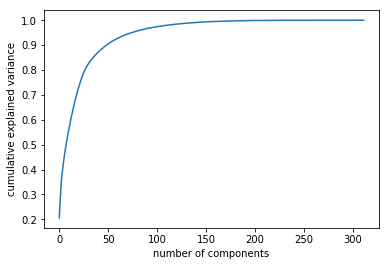

In [73]:
from sklearn.decomposition import SparsePCA, PCA

pca = PCA().fit(train_prepared.toarray())
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [75]:
pca = PCA(0.99).fit(X_train.toarray())

In [79]:
X_train_pca = pca.transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

In [81]:
########################################################################
##  XGBoost
########################################################################

from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor()
grid_xgb = {
    'learning_rate': [x/100 for x in range(1, 10)],
    'n_estimators': [1750],
    'min_child_weight': [0.9, 1, 1.05, 1.1, 1.2, 1.3, 1.5],
    'max_delta_step': [0, 0.5, 0.05, 0.1],
    'max_depth': [x for x in range(3, 10)],
    'subsample': [0.4 + x/10 for x in range(1, 4)],
    'gamma': [0, 1e-5, 1e-6],
    'colsample_bytree': [0.4 + x/10 for x in range(1, 6)],
    #'lambda': [0.9 + x/50 for x in range(1,10)],
    #'alpha': [0, 0.05, 0.1]
}

clf_xgb_pca = RandomizedSearchCV(xgb, grid_xgb, cv=5, n_iter=30, scoring='neg_mean_absolute_error')
clf_xgb_pca.fit(X_train_pca, y_train)

y_true, y_pred = y_train, clf_xgb_pca.predict(X_train_pca)

var = explained_variance_score(y_true, y_pred)
ab_err = mean_absolute_error(y_true, y_pred)
sq_err = mean_squared_error(y_true, y_pred)
sq_log_err = mean_squared_log_error(y_true, y_pred)
med_err = median_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('**** XGBoost ****')
print('Best Parameters:', clf_xgb_pca.best_params_)
print('Explained Variance:', var)
print('Mean Absolute Error:', ab_err)
print('Mean Squared Error:', sq_err)
print('Mean Squared Log Error:', sq_log_err)
print('Median Absolute Error:', med_err)
print('R2:', r2)

clf_xgb_pca.best_estimator_.save_model('xgb_best_2018-11-29_pca.model')

**** XGBoost ****
Best Parameters: {'subsample': 0.6000000000000001, 'n_estimators': 1750, 'min_child_weight': 1.05, 'max_depth': 4, 'max_delta_step': 0.5, 'learning_rate': 0.01, 'gamma': 1e-06, 'colsample_bytree': 0.8}
Explained Variance: 0.9950832005178744
Mean Absolute Error: 4252.460894691781
Mean Squared Error: 31009533.2619571
Mean Squared Log Error: 0.0013046840233939586
Median Absolute Error: 3424.4765625
R2: 0.9950831500307474


In [83]:
xgbdf_pca = pd.DataFrame({'Id': list(range(1461, 2920)), 'SalePrice': clf_xgb_pca.best_estimator_.predict(X_test_pca)})
xgbdf_pca.to_csv('xgb_preds_2018-11-29_pca.csv', sep=',', index=False)